<a href="https://colab.research.google.com/github/MaximL98/CrawlingInMyProtein.github.io/blob/master/HW02/CrawlingInMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crawling in My Protein: by Crawling In My Skin™

In this colab file, we will implement a basic crawler for HW2


In [ ]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

This is the website link we will scrape

In [ ]:
mp_url = "https://www.myprotein.co.il/nutrition/protein.list"

# Use requests to retrieve data from a given URL
mp_response = requests.get(mp_url)

# Parse the whole HTML page using BeautifulSoup
mp_soup = BeautifulSoup(mp_response.text, 'html.parser')


**Traverse the page https://www.myprotein.co.il/nutrition/protein.list**

For each item in that page, get the name of the product and it's link


In [ ]:
mp_main = 'https://www.myprotein.co.il'

all_products = mp_soup.find('ul', {'class': 'productListProducts_products'})
product_list = all_products.find('li', {'class': 'productListProducts_product'})

if all_products:
  product_list = all_products.find_all('li')
  links = []
  product_names = []
  for li in product_list:
    a_tag_array = li.findAll('a', {'class': 'productBlock_link'})
    a_tag = a_tag_array[1]
    if a_tag:
      links.append(mp_main + a_tag['href'])
      h3_tag = a_tag.find('h3', {'class': 'productBlock_productName'})
      if h3_tag:
        product_names.append(h3_tag.text.strip())

print(product_names)
print(links)


['Impact Whey Protein Powder', 'Impact Whey Isolate Powder', 'Clear Whey Protein Powder', 'Clear Vegan Protein', 'Impact Soy Protein', 'Impact Vegan Protein', 'Impact Pea Protein', 'Impact Weight Gainer', 'THE Whey', 'Impact Diet Whey', 'Impact Casein Powder', 'Whey Forward Isolate', 'Plant Protein Superblend', 'Total Protein Blend', 'Collagen Protein Powder', 'Clear Whey Diet', 'Protein Meal Replacement Blend', 'Clear Collagen Protein Powder', 'Clear Vegan Protein (Sample)', 'Clear Whey Protein (Sample)', 'Clear Whey Hydrate', 'Clear Weight Gainer', 'Hydrolysed Whey Protein Powder', 'Protein Hot Chocolate', 'Vegan Protein Blend (Sample)', 'THE Diet™', 'Soy Protein Isolate (Sample)', 'All-in-One Recovery', 'Breakfast Smoothie', 'Clear Soy Protein']
['https://www.myprotein.co.il/sports-nutrition/impact-whey-protein-powder/10530943.html', 'https://www.myprotein.co.il/sports-nutrition/impact-whey-isolate-powder/10530911.html', 'https://www.myprotein.co.il/sports-nutrition/clear-whey-prote

For each item, find the div which contains the ingredients the product is made of.

In [ ]:
ingredients_array = []

for link in links:
  # Use requests to retrieve data from a given URL
  mp_response = requests.get(link)
  # Parse the whole HTML page using BeautifulSoup
  mp_soup = BeautifulSoup(mp_response.text, 'html.parser')

  # Ingredient information retrieval
  product_div_ingredients = mp_soup.find('div', {'class': 'productDescription_contentPropertyListItem_ingredients'})
  ingredients_div = product_div_ingredients.find('div', class_='athenaProductPageSynopsisContent')
  ingredients_text = ingredients_div.text.strip()
  ingredients_array.append(ingredients_text)



 **Print first 3 ingredients**

 Example of how the first 3 product ingredients description looks like

In [ ]:
for i, ing in enumerate(ingredients_array):
  print(f"Product name: {product_names[i]}\n")
  print("Description:")
  #print(details_array_new[i])
  print(ing + '\n')
  print("************************************************************************************************************************************************************************************************************************************************************************************************************")

  if i == 2:
    break;

Product name: Impact Whey Protein Powder

Description:
Ingredients: Whey Protein Concentrate (Milk) (100%) (contains Emulsifiers (Soya Lecithin, Sunflower Lecithin)).

************************************************************************************************************************************************************************************************************************************************************************************************************
Product name: Impact Whey Isolate Powder

Description:
Ingredients: Whey Protein Isolate (Milk) (90%) (contains Emulsifiers (Soya Lecithin, Sunflower Lecithin)), Fat Reduced Cocoa Powder (8%), Natural Flavouring, Sweetener (Sucralose).

******************************************************************************************************************************************************************************************************************************************************************************************************

Here, we implement the functions which pre-process words.
This process removes stopwords such as [a, this, you, they, is], removes punctuations [. , _ -], and converts them into their basic form [basically -> basic, ingredients -> ingredient]

In [ ]:
# Imports for word preprocessing
import re
from collections import defaultdict
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from nltk.corpus import stopwords

# List of english stop words
STOP_WORDS = set(stopwords.words('english'))

# Create a dictionary, each entry in the dictionary is a tuple of (word, list), where list
# is the index in which that word is located in the string "text"
def create_inverted_index(text):
  """
  Args:
    text: string
  Returns:
    dictionary [(word, list), (word, list), ....]
  """
  inverted_index = defaultdict(list)
  words = text.split()

  for index, word in enumerate(words):
    inverted_index[word].append(index)

  return inverted_index

# Input is
def preprocess_text(text):
  """
  Args:
    text: string
  Returns:
    list of preprocessed words
  """
  # Remove punctuation
  text = re.sub(r'[^\w\s]', '', text)
  # Convert to lowercase
  text = text.lower()
  # Tokenize
  words = nltk.word_tokenize(text)
  # Remove stop words
  words = [word for word in words if word not in STOP_WORDS]
  # Lemmatize
  lemmatizer = WordNetLemmatizer()
  lemmas = [lemmatizer.lemmatize(word) for word in words]
  return lemmas

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Function to find the 15 most common words**

>




In [ ]:
# Create one long string to easily search the number of appearences of every dictionary word in the documents.
string_of_texts = ""

# For each document in ingredients_and_description_array, preprocess the text. This leaves each document with the important words.
for i, text in enumerate(ingredients_array):

  # Preprocess the text variable, where text=string (Can be product overview or ingredients). Return list of preprecessed words.
  list_of_preprocessed_words = preprocess_text(text) # For each
  preprocessed_text = ""

  for word in list_of_preprocessed_words:
    preprocessed_text += word + " " # Convert the list to a string of words

  string_of_texts += preprocessed_text # Create on long string for inverted indexation
string_of_texts = string_of_texts + "no doesnt not doesnt"
# Calculate the inverted index for the entire word list
invertedIndex = create_inverted_index(string_of_texts)

# Two examples for words and the number of times they appear in 60 documents.
print("\"ingredient\", appears", len(invertedIndex["ingredient"]), " times.", )
print("\"whey\", appears", len(invertedIndex["whey"]), " times.")

# List of all words extracted from the documents.
print(invertedIndex.keys())


"ingredient", appears 30  times.
"whey", appears 34  times.
dict_keys(['ingredient', 'whey', 'protein', 'concentrate', 'milk', '100', 'contains', 'emulsifier', 'soya', 'lecithin', 'sunflower', 'isolate', '90', 'fat', 'reduced', 'cocoa', 'powder', '8', 'natural', 'flavouring', 'sweetener', 'sucralose', 'hydrolysate', '96', 'acid', 'citric', 'acidity', 'regulator', 'phosphoric', 'antifoaming', 'agent', 'dimethyl', 'polysiloxane', 'silicon', 'dioxide', 'hydrolysed', 'pea', '78', 'juice', '12', 'lemon', 'lime', 'vitamin', 'b', 'blend', 'niacin', 'pantothenic', 'b6', 'thiamin', 'riboflavin', 'folic', 'biotin', 'b12', 'curcuma', 'oil', 'extract', 'vegan', '88', 'fava', 'bean', 'creamer', 'modified', 'tapioca', 'starch', 'anticaking', 'antioxidant', 'alphatocopherol', 'thickener', 'xanthan', 'gum', '85', 'dlalphatocopherol', 'stabiliser', 'oat', 'flour', '63', '28', 'maltodextrin', '5', '92', 'lacprodan', 'hydropower', 'salt', 'colour', 'ammonia', 'caramel', 'bacillus', 'coagulans', 'myzyme',

**This section finds the top 15 words.**

In [ ]:
NUM_COMMON_WORDS = 15

copy_of_invertedIndex = invertedIndex.copy()

list_of_most_common_words = []
maxValue = 0
maxWord = ""

for i in range(NUM_COMMON_WORDS):
  for word in copy_of_invertedIndex.keys():
    if len(copy_of_invertedIndex[word]) > maxValue:
      maxValue = len(copy_of_invertedIndex[word])
      maxWord = word
  list_of_most_common_words.append((maxWord, maxValue))
  printWordAndCount = "\"" + maxWord + "\"" + " appears " + str(maxValue) + " times."
  print(printWordAndCount)
  copy_of_invertedIndex.pop(maxWord)
  maxValue = 0
  maxWord = ""

"vitamin" appears 78 times.
"protein" appears 70 times.
"milk" appears 59 times.
"acid" appears 52 times.
"powder" appears 49 times.
"flavouring" appears 44 times.
"whey" appears 34 times.
"sweetener" appears 33 times.
"sucralose" appears 33 times.
"ingredient" appears 30 times.
"lecithin" appears 29 times.
"isolate" appears 26 times.
"oil" appears 26 times.
"sunflower" appears 23 times.
"soy" appears 23 times.


**Take the 15 most common words and create the indexes for 30 documents. (We have used 30 documents instead of 20 because a lot of rows consisted of 0's only).**

In [ ]:
print(list_of_most_common_words)
print(ingredients_array[0])

[('vitamin', 78), ('protein', 70), ('milk', 59), ('acid', 52), ('powder', 49), ('flavouring', 44), ('whey', 34), ('sweetener', 33), ('sucralose', 33), ('ingredient', 30), ('lecithin', 29), ('isolate', 26), ('oil', 26), ('sunflower', 23), ('soy', 23)]
Ingredients: Whey Protein Concentrate (Milk) (100%) (contains Emulsifiers (Soya Lecithin, Sunflower Lecithin)).


In [ ]:
# Take 30 retrieved texts from different products
print(len(ingredients_array))
word_vector_list = []

for word in list_of_most_common_words:
  word_vector = []
  for i in range(len(ingredients_array)):
    word_vector.append(ingredients_array[i].lower().count(word[0]))

  space_num = 12 - len(word[0])
  space = ""
  for i in range(space_num):
    space += " "
  print(word[0], space , "=", word_vector)
  word_vector_list.append(word_vector)


30
vitamin       = [0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 50, 0, 3, 0, 6, 7, 0, 0, 0, 1, 0, 0, 0, 4]
protein       = [1, 1, 1, 1, 1, 3, 1, 3, 4, 5, 0, 1, 1, 5, 0, 1, 15, 0, 1, 1, 1, 2, 1, 2, 2, 5, 6, 3, 1, 1]
milk          = [1, 1, 1, 0, 0, 0, 0, 2, 4, 4, 1, 1, 0, 6, 0, 1, 20, 0, 0, 1, 1, 2, 1, 4, 0, 4, 1, 2, 1, 0]
acid          = [0, 0, 4, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 20, 0, 4, 4, 6, 3, 0, 0, 1, 4, 0, 0, 0, 4]
powder        = [0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 22, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 3, 2]
flavouring    = [0, 1, 1, 1, 0, 2, 3, 1, 2, 1, 0, 3, 3, 1, 1, 1, 5, 0, 1, 1, 1, 1, 0, 1, 2, 3, 5, 1, 1, 1]
whey          = [1, 1, 1, 0, 0, 0, 0, 1, 3, 2, 0, 1, 0, 3, 0, 1, 10, 0, 0, 1, 1, 1, 1, 0, 0, 3, 0, 2, 1, 0]
sweetener     = [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 5, 0, 1, 1, 1, 1, 0, 1, 1, 1, 5, 1, 1, 1]
sucralose     = [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 5, 0, 1, 1, 1, 1, 0, 1, 1, 1, 5, 1, 1, 1]
ingredient    = [1, 1, 1, 1,

# **Save data vectors in a google sheets file**

Create a new google sheets file in your google drive.
Define the sheet_id variable to be the unique key, located in your google drive address.

See the image below:

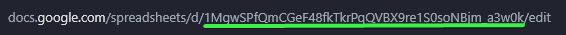

In [ ]:
# Your unique sheet_id
sheet_id = "1qQnpFjCVNhV5qzZt2tZOkw3QCKtpw7MXxiG17YgeIao"
worksheet_name = "Sheet1"

import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)
sh = gc.open_by_key(sheet_id)

sh.worksheets()
worksheet = sh.worksheet(worksheet_name)
worksheet.get_all_records()

df = pd.DataFrame(worksheet.get_all_records())



Mounted at /content/drive


How the Inverted Index looks like

In [ ]:
#for i, ing in enumerate(ingredients_array):
#  df.at[i, 'Product_Name'] = product_names[i]
#  df.at[i, 'Product_Description'] = details_array_new[i]
#  df.at[i, 'Ingredients'] = ing


docName = ""
for i, word in enumerate(list_of_most_common_words):
  df.at[i, 'Word'] = word[0]
  for j in range(len(ingredients_array)):
    docName = "Doc" + str(j)
    df.at[i, docName] = word_vector_list[i][j]

print(df.to_string())

worksheet.update([df.columns.values.tolist()] + df.values.tolist())

          Word  Doc0  Doc1  Doc2  Doc3  Doc4  Doc5  Doc6  Doc7  Doc8  Doc9  Doc10  Doc11  Doc12  Doc13  Doc14  Doc15  Doc16  Doc17  Doc18  Doc19  Doc20  Doc21  Doc22  Doc23  Doc24  Doc25  Doc26  Doc27  Doc28  Doc29
0      vitamin     0     0     0     3     0     0     0     0     0     0      0      0      0      0      0      4     50      0      3      0      6      7      0      0      0      1      0      0      0      4
1      protein     1     1     1     1     1     3     1     3     4     5      0      1      1      5      0      1     15      0      1      1      1      2      1      2      2      5      6      3      1      1
2         milk     1     1     1     0     0     0     0     2     4     4      1      1      0      6      0      1     20      0      0      1      1      2      1      4      0      4      1      2      1      0
3         acid     0     0     4     4     0     0     0     0     0     1      0      0      0      0      0      2     20      0      4   

{'spreadsheetId': '1qQnpFjCVNhV5qzZt2tZOkw3QCKtpw7MXxiG17YgeIao',
 'updatedRange': 'Sheet1!A1:AE16',
 'updatedRows': 16,
 'updatedColumns': 31,
 'updatedCells': 496}

Calculate tf, idf, tf-idf

In [ ]:
from math import log10

In [ ]:
num_of_documents = 30
num_of_terms = 15

In [ ]:
terms_list = []
for i in range(num_of_terms):
  terms_list.append(list_of_most_common_words[i][0])

In [ ]:
# tf(t, d) = count of t in docs
def tf():
  tf_dict = {}
  term_cnt_in_doc = []
  total_num_of_terms_in_docs = 0

  for i in range(num_of_terms):
    term_cnt_in_doc.append(sum(word_vector_list[i]))
    tf_dict[terms_list[i]] = term_cnt_in_doc[i]
  return tf_dict

In [ ]:
print(tf())

{'vitamin': 78, 'protein': 70, 'milk': 59, 'acid': 57, 'powder': 49, 'flavouring': 44, 'whey': 34, 'sweetener': 33, 'sucralose': 33, 'ingredient': 30, 'lecithin': 29, 'isolate': 26, 'oil': 26, 'sunflower': 23, 'soy': 40}


In [ ]:
# df(t) = occurrence of t in documents
def df():
  df_dict = {}
  for i in range(num_of_terms):
    zero_one = [1 if num != 0 else 0 for num in word_vector_list[i]]
    df_dict[terms_list[i]] = sum(zero_one)
  return df_dict

In [ ]:
print(df())

{'vitamin': 8, 'protein': 27, 'milk': 20, 'acid': 12, 'powder': 19, 'flavouring': 25, 'whey': 17, 'sweetener': 25, 'sucralose': 25, 'ingredient': 30, 'lecithin': 12, 'isolate': 14, 'oil': 12, 'sunflower': 15, 'soy': 13}


In [ ]:
# idf(t) = log(N/df(t)) (N - total number of documents)
def idf(df_dict):
  idf_dict = {}
  for term, value in df_dict.items():
    if df_dict[term] == 0:
      idf_dict[term] = 0
      continue
    idf_dict[term] = log10(num_of_documents / df_dict[term])
  return idf_dict

In [ ]:
print(idf(df()))

{'vitamin': 0.5740312677277188, 'protein': 0.04575749056067514, 'milk': 0.17609125905568124, 'acid': 0.3979400086720376, 'powder': 0.19836765376683346, 'flavouring': 0.07918124604762482, 'whey': 0.2466723333413885, 'sweetener': 0.07918124604762482, 'sucralose': 0.07918124604762482, 'ingredient': 0.0, 'lecithin': 0.3979400086720376, 'isolate': 0.3309932190414244, 'oil': 0.3979400086720376, 'sunflower': 0.3010299956639812, 'soy': 0.36317790241282566}


In [ ]:
# tf-idf(t, d) = (1+log10(tf(t, d)) * idf(t)
def tf_idf(tf,idf):
  tf_idf_dict = {}
  for term in tf.keys():
    if tf[term] == 0:
      tf_idf_dict[term] = 0
      continue
    tf_idf_dict[term] = (1 + log10(tf[term])) * idf[term]
  return tf_idf_dict

In [ ]:
print(tf_idf(tf(),idf(df())))

{'vitamin': 1.66015273117091, 'protein': 0.1301845467101477, 'milk': 0.4879228193870323, 'acid': 1.0966728639653616, 'powder': 0.5336478845679888, 'flavouring': 0.20931187679210517, 'whey': 0.6244458112713444, 'sweetener': 0.199419071947844, 'sucralose': 0.199419071947844, 'ingredient': 0.0, 'lecithin': 0.9798866806379186, 'isolate': 0.7993398023441071, 'oil': 0.9610145150342471, 'sunflower': 0.7109509202358797, 'soy': 0.9450106896028247}


# Section 2
This section handles the queries. A user will write a query to find items containing or not containing ingredients.

In [ ]:
# Function to remove words from a query that do not appear in our dictionary.
def filter_query(query, useBasicFilter):
  if useBasicFilter:
    return basicFilter(query)
  else:
    return advancedFilter(query)

def advancedFilter(query):
  pass

def basicFilter(query):
  """
  Args:
    string\list: query
  Returns:
    list of words in the query that appear in our dictionary
  """

  # Convert query string to list
  if (type(query) == str):
    query = query.lower()
    query = query.split()

  # Remove all words such as "find", "return", "contains", "product", "ingredient"
  negative_words = ["no", "not", "none", "doesnt", "without"]

  # Remove all words such as "no", "not", "none", "doesnt", add ! to the next ingredient in the list
  # Example:
  """
    query: "No milk no sucralose no sugar whey"
    query after the for loop: ["!milk", "!sucralose", "!sugar", "whey"]

  """
  for i, word in enumerate(query):
    if (word in negative_words):
      if (i+1 < len(query)):
        string_to_replace = "!" + query[i+1]
        query[i+1] = string_to_replace
        query.remove(word)

  # Remove all words not found in our dictionary
  return_q = []
  for word in query:
    if word[0] != "!":
      return_q.append(word) if word in invertedIndex.keys() else None
    elif word[1:] in invertedIndex.keys() and word[0] == '!':
      return_q.append(word)

  return return_q

In [ ]:
# Example
query = "milk sugar sucralose whey dark choclate"

# Preprocess the user's query
query_words_list = preprocess_text(query)

print("Query before filtration: ", query_words_list)

query_words_list = filter_query(query_words_list, True)

print("Query after filtration: ", query_words_list)
# This query no
print("Query to perform is: ", query_words_list)

Query before filtration:  ['milk', 'sugar', 'sucralose', 'whey', 'dark', 'choclate']
Query after filtration:  ['milk', 'sucralose', 'whey']
Query to perform is:  ['milk', 'sucralose', 'whey']


In [ ]:
# Example: query should be of the format "ingredient ingredient ingredient no ingredient....."
# Note that if a word doesn't exist in our dictionary, then it gets removed from the query
query2 = "milk sugar no whey no lecithin papaya"

print("Query before filtration: ", query2)

query_words_list2 = filter_query(query2, True)

print("Query after filtration: ", query2)
# This query no
print("Query to perform is: ", query_words_list2)

Query before filtration:  milk sugar no whey no lecithin papaya
Query after filtration:  milk sugar no whey no lecithin papaya
Query to perform is:  ['milk', '!whey', '!lecithin']


In [ ]:
print(preprocess_text(ingredients_array[0]))

['ingredient', 'whey', 'protein', 'concentrate', 'milk', '100', 'contains', 'emulsifier', 'soya', 'lecithin', 'sunflower', 'lecithin']




# Sectio 3: The Search Begins ☕

In [ ]:
list_of_most_common_only_words = []
for word in list_of_most_common_words:
  list_of_most_common_only_words.append(word[0])

Find the top most relevant documents based on the query

In [ ]:
import copy
def find_top_10(q):
    q_list_filtered = filter_query(q, True)
    temp_word_vector_list = copy.deepcopy(word_vector_list)
    in_case_of_less_then_ten = copy.deepcopy(word_vector_list)
    top_values = []

    for q in q_list_filtered:
      if q[0] == '!' and q[1:] in list_of_most_common_only_words:
          index = list_of_most_common_only_words.index(q[1:])
          for j in range(30):
            if max(temp_word_vector_list[index]) == 0:
              break
            most_appearances = pd.Series(temp_word_vector_list[index]).idxmax()
            temp_word_vector_list[index][most_appearances] = 0
            for x in range(15):
              temp_word_vector_list[x][most_appearances] = 0

    word_inx = []
    for q in q_list_filtered:
      if q in list_of_most_common_only_words:
          index = list_of_most_common_only_words.index(q)
          word_inx.append(index)

    search_vector = np.empty(30)
    for z in word_inx:
      search_vector += temp_word_vector_list[z]
    search_vector = search_vector.tolist()

    for i in range(30):
      if max(search_vector) <= 0:
        break
      most_appearances = max(search_vector)
      max_value_index = search_vector.index(most_appearances)
      top_values.append(max_value_index)
      search_vector[max_value_index] = 0


    if len(top_values) < 10:
      search_vector_2 = np.empty(30)
      for z in word_inx:
        search_vector_2 += in_case_of_less_then_ten[z]
      search_vector_2 = search_vector_2.tolist()

      for i in range(30):
        if max(search_vector_2) <= 0:
          break
        most_appearances = max(search_vector_2)
        max_value_index = search_vector_2.index(most_appearances)
        if max_value_index in top_values:
          search_vector_2[max_value_index] = 0
          continue
        top_values.append(max_value_index)
        search_vector_2[max_value_index] = 0
        if len(top_values) == 10:
          break



    return top_values

In [ ]:
most_relevant_docs = find_top_10(q)

Returning links of products that best fit the query 🦾


In [ ]:

def return_links(most_relevant_docs):
  links_to_return = []
  for most_relevant_doc in most_relevant_docs:
    if len(links_to_return) == 10:
      break
    if links[most_relevant_doc] in links_to_return:
      continue
    else:
      links_to_return.append(links[most_relevant_doc])
      print(links[most_relevant_doc])
  return links_to_return



In [ ]:
print(return_links(most_relevant_docs))

['https://www.myprotein.co.il/sports-nutrition/impact-casein-powder/10798909.html', 'https://www.myprotein.co.il/sports-nutrition/clear-soy-protein/12853864.html', 'https://www.myprotein.co.il/sports-nutrition/protein-meal-replacement-blend/11324199.html', 'https://www.myprotein.co.il/sports-nutrition/total-protein-blend/10529951.html', 'https://www.myprotein.co.il/sports-nutrition/the-whey/11353515.html', 'https://www.myprotein.co.il/sports-nutrition/impact-diet-whey/10530657.html', 'https://www.myprotein.co.il/sports-nutrition/protein-hot-chocolate/10926373.html', 'https://www.myprotein.co.il/sports-nutrition/the-diet/11350864.html', 'https://www.myprotein.co.il/sports-nutrition/impact-weight-gainer/10529988.html']


**Example 1:** We want a protein product without soy and without cocoa powder
Calculations are made in the docx file. (Question 3, section 3).
First participant in the query relevance test: Yuval a.

In [ ]:
query_test_1 = "I would like a protein product but not soy and no cocoa"
most_relevant_docs_test_1 = find_top_10(query_test_1)
nothing = return_links(most_relevant_docs_test_1)

https://www.myprotein.co.il/sports-nutrition/vegan-protein-blend/11776868.html
https://www.myprotein.co.il/sports-nutrition/clear-weight-gainer/13096868.html
https://www.myprotein.co.il/sports-nutrition/protein-hot-chocolate/10926373.html
https://www.myprotein.co.il/sports-nutrition/vegan-protein-blend-sample/11332873.html
https://www.myprotein.co.il/sports-nutrition/clear-whey-protein-powder/12081395.html
https://www.myprotein.co.il/sports-nutrition/clear-vegan-protein/12360400.html
https://www.myprotein.co.il/sports-nutrition/pea-protein-isolate/10530136.html
https://www.myprotein.co.il/sports-nutrition/whey-forward-isolate/14960829.html
https://www.myprotein.co.il/sports-nutrition/plant-protein-superblend/13972449.html
https://www.myprotein.co.il/sports-nutrition/clear-whey-diet/13125562.html


**Example 2:** We want a protein powder specifically, without oil and without soy.
Calculations are made in the docx file. (Question 3, section 3).
Second participant in the query relevance test: Genrih Atayan.

In [ ]:
query_test_2 = "I want a protein powder with no oil and no soy"
most_relevant_docs_test_2 = find_top_10(query_test_2)

nothing = return_links(most_relevant_docs_test_2)

https://www.myprotein.co.il/sports-nutrition/protein-hot-chocolate/10926373.html
https://www.myprotein.co.il/sports-nutrition/clear-whey-hydrate/12869895.html
https://www.myprotein.co.il/sports-nutrition/clear-whey-protein-powder/12081395.html
https://www.myprotein.co.il/sports-nutrition/collagen-protein-powder/11067704.html
https://www.myprotein.co.il/sports-nutrition/clear-whey-protein-sample/12081401.html
https://www.myprotein.co.il/sports-nutrition/hydrolysed-whey-protein-powder/10529805.html
https://www.myprotein.co.il/sports-nutrition/clear-soy-protein/12853864.html
https://www.myprotein.co.il/sports-nutrition/protein-meal-replacement-blend/11324199.html
https://www.myprotein.co.il/sports-nutrition/impact-diet-whey/10530657.html
https://www.myprotein.co.il/sports-nutrition/total-protein-blend/10529951.html
